In [153]:
import numpy as np
import scipy as sp
import seaborn as sns
import copy as cp
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style("whitegrid")
sns.set_context("talk")

In [167]:
def med_abs_dev(arr):
    med = np.median(arr)
    dev = np.abs(arr - med)
    mad = np.median(dev)
    return mad


def modified_Z_score(arr):
    med = np.median(arr)
    mad = med_abs_dev(arr)
    M = 0.6745*(arr - med)/mad
    return M


def shifted_box_cox(arr, epsilon=10000.0*np.finfo(float).eps):
    arr_tmp = arr - (np.min(arr) - epsilon)
    print(np.min(arr_tmp))
    arr_bc = sp.stats.boxcox(arr_tmp)[0]
    return arr_bc


def find_outliers(arr, cutoff = 10):
    
    # box-cox power tranform data to ~ normalize
    arr_bc = shifted_box_cox(arr)
    
    # compute modified z-score array
    arr_modZ = modified_Z_score(arr_bc)
    
    # put together index / data point dict
    is_outlier = abs(arr_modZ) > cutoff
    outlier_dict = {i:a for i,a in enumerate(arr) if is_outlier[i]}
    
    return outlier_dict


def outlier_response_curve(arr,min_cutoff=1,max_cutoff=25, npoints=1000):
    arr_bc = shifted_box_cox(arr)
    arr_modZ = modified_Z_score(arr_bc)
    
    cutoff_grid = np.linspace(min_cutoff, max_cutoff, npoints, endpoint=True)
    num_outliers = np.sum(abs(arr_modZ[:,None]) > cutoff_grid[None,:], axis=0)
    
    return np.vstack([cutoff_grid,num_outliers])

In [168]:
file_lengths = np.loadtxt("bdqc_sandbox/bdqc_file_lengths.txt").astype(int)
file_lengths_news = np.loadtxt("bdqc_sandbox/newsgroup_file_lengths.txt").astype(int)

2.21689333557e-12


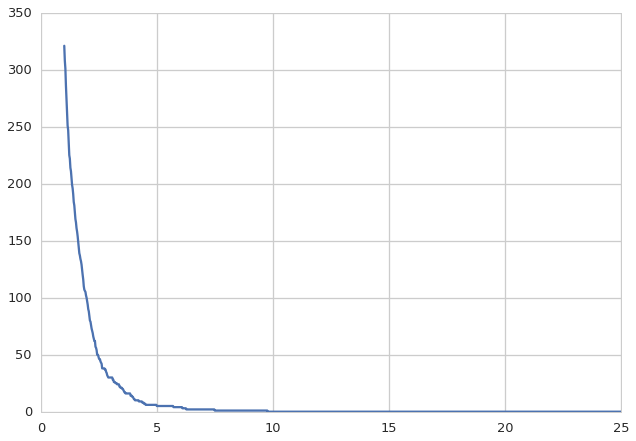

In [175]:
ouliers = outlier_response_curve(file_lengths_news)
plt.plot(ouliers[0],ouliers[1]);

In [80]:
outliers = find_outliers(file_lengths)

/users/rdonovan/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


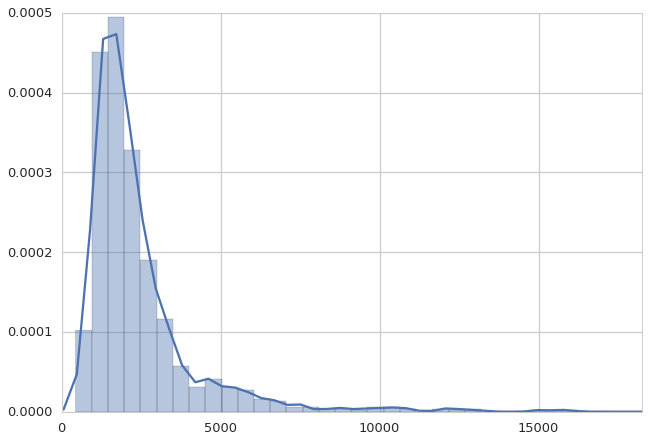

In [170]:
ax = sns.distplot(file_lengths_news, bins=100);
ax.set_xlim(0,np.max(file_lengths));

2.21689333557e-12


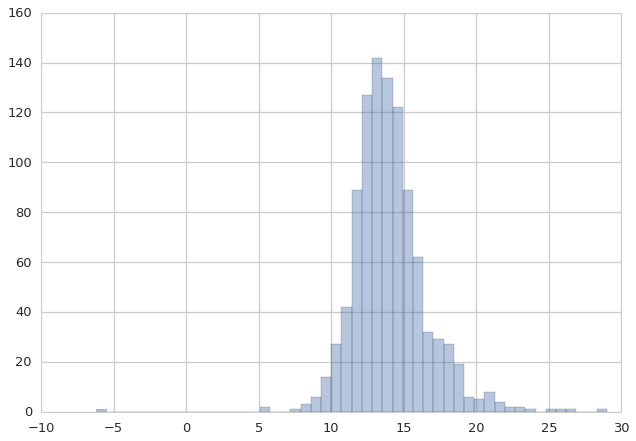

In [171]:
ax = sns.distplot(shifted_box_cox(file_lengths_news), kde=False, bins=50);

2.21689333557e-12


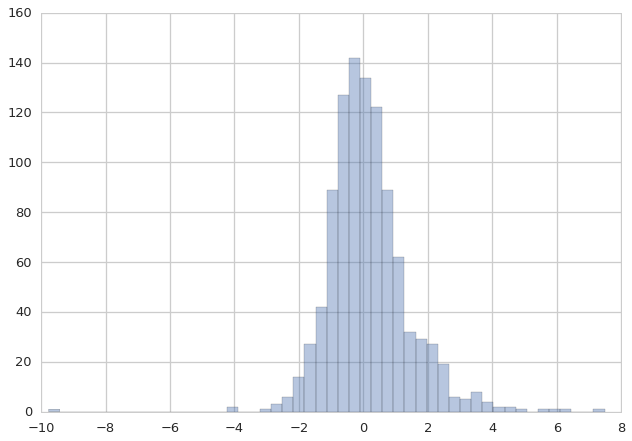

In [172]:
ax = sns.distplot(modified_Z_score(shifted_box_cox(file_lengths_news)), kde=False, bins=50);

In [128]:
normal_sample = np.random.normal(0,1,1000)

In [129]:
%lprun find_outliers(normal_sample, cutoff=10)

ERROR: Line magic function `%lprun` not found.


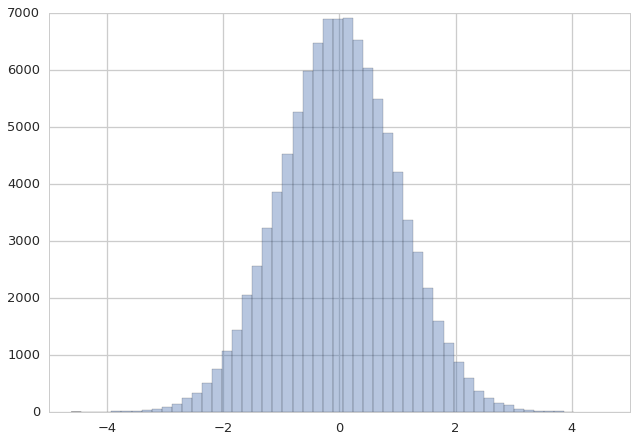

In [127]:
ax = sns.distplot(modified_Z_score(shifted_box_cox(normal_sample)), kde=False, bins=50);

In [ ]:
%lprun find_outliers(normal_sample, cutoff=10)

In [123]:
import hdbscan

min_cluster_size = int(np.round(len(file_lengths)/50))
clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
cluster_labels = clusterer.fit_predict(np.asmatrix(file_lengths).T)

In [124]:
np.unique(cluster_labels)

array([-1,  0,  1])

In [125]:
clusterer.outlier_scores_

array([ 0.33333333,  0.        ,  0.97468354, ...,  0.99224806,
        0.99224806,  0.99224806])

In [126]:
file_lengths[clusterer.outlier_scores_>0.99]

array([ 3762,  4618,   834,  1007,   810, 10447,  3655,  1742,   949,
        1065,   918,  1208,  2579,  1237,  1556,  3005,  1064,  1437,
        1149,  1798,  1265,  1395,   750,  2075,  1181,  6520,  1187,
        1272,  2098,  7605, 18249,   746,  1542,   947,   731,  1061,
        2995,  2255,   774,   956,  1072,  1150,  1214,  1161,  1848,
        1479,  1686,  1383,  1382,   921, 11772,   731, 12687,  1384,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3])

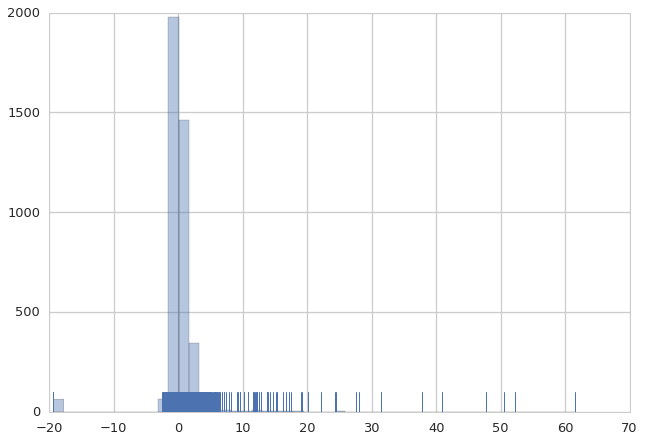

In [131]:
x = modified_Z_score_bc(file_lengths)
sns.distplot(x, kde=False, rug=True);

In [140]:
a = np.random.random(1000)
b = np.linspace(0, 25, 101, endpoint=True)
x = np.sum(abs(a[:,None])<b[None,:], axis=0)